**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Primer Semestre 2021**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Corto:** 02

**Datos de la entrega:** Viernes 16 de abril 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Luis Adrián Badilla Godínez
- Jorge Eduardo Gutiérrez Mata





# Parte 1.  Series temporales y graficación

Se le suministra un archivo llamado monthly-sunspots2.csv.  Utilizando este archivo realice lo siguiente, completando en celdas de código y/o texto según convenga. Documente bien su código:


### 1.1  (1 punto)
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [52]:
import pandas as pd
# Cargar el DataFrame en Jupyter
series = pd.read_csv("monthly-sunspots2.csv", parse_dates=["Month"])
#series = pd.read_csv('monthly-sunspots2.csv', header=0, index_col=0,                    parse_dates=True, squeeze=True)
print(series.head(5))
print(type(series))
print(type(series.iloc[0]))

       Month  Sunspots
0 1963-01-01      19.8
1 1963-02-01      24.4
2 1963-03-01      17.1
3 1963-04-01      29.3
4 1963-05-01      43.0
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### 1.2   (2 puntos)
- Muestra el promedio y la desviación estándar de los datos

In [53]:
data_mean = series.mean()
data_std = series.std()
print( str(data_mean) + "\n" + str(data_std) )

Sunspots    71.397619
dtype: float64
Sunspots    49.174904
dtype: float64


<ipython-input-53-b090b1dd2014>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_mean = series.mean()


### NOTA: Solución a futuro
- dfms['Month'] = dfms['Month'].values.astype(float)
- ols1 = pd.ols(y=dfms['Close'], x=dfms['Month'], intercept=True)

From: https://stackoverflow.com/questions/40453744/pandas-dataframe-cannot-astype-a-datetimelike-from-datetime64ns-to-float

- En caso contrario se puede hacer como abajo, calculándolos manualmente.

### 1.3   (2 puntos)
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, para todos los febreros, etc.

In [82]:
df = dfms.rename(columns={"Month": "Date"})

cont = 1
valores=[]
while cont<=12:
    monthData = df.loc[(df['Date'].dt.month==cont)]#.mean() no se usa para evitar la futura conversión de arriba
    promedio = 0        
    for i in monthData["Sunspots"]:
        promedio+=i
    promedio = promedio / len(monthData)
    valores.append(promedio)        
    cont+=1
months= ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
result = pd.DataFrame(valores,
                     columns = ["Promedio"],
                     index = months)

print(result)

      Promedio
Ene  70.676190
Feb  73.890476
Mar  69.523810
Abr  69.266667
May  73.757143
Jun  69.895238
Jul  70.204762
Ago  69.880952
Sep  76.114286
Oct  73.814286
Nov  65.628571
Dic  74.119048


### 1.4    (2 puntos)
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=3

In [55]:
#series = pd.read_csv('monthly-sunspots2.csv', header=0, index_col=0)
series = pd.read_csv('monthly-sunspots2.csv', header=0, index_col=0,
                    parse_dates=True, squeeze=True)
sunSpots = pd.DataFrame(series.values)
dataframe = pd.concat([sunSpots.shift(3), sunSpots], axis=1)
dataframe.columns = ['t-3', 't+1']
print(dataframe.head(8))

    t-3   t+1
0   NaN  19.8
1   NaN  24.4
2   NaN  17.1
3  19.8  29.3
4  24.4  43.0
5  17.1  35.9
6  29.3  19.6
7  43.0  33.2


### 1.5   (2 puntos)
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 2. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [56]:
width = 2
shifted = sunSpots.shift(width - 1)
window = shifted.rolling(window=width)
dataframe2 = pd.concat([window.min(), window.mean(), window.max(), sunSpots], axis=1)
dataframe2.columns = ['mínimo', 'media', 'máximo', 't+1']
print(dataframe2.head(10))

   mínimo  media  máximo   t+1
0     NaN    NaN     NaN  19.8
1     NaN    NaN     NaN  24.4
2    19.8  22.10    24.4  17.1
3    17.1  20.75    24.4  29.3
4    17.1  23.20    29.3  43.0
5    29.3  36.15    43.0  35.9
6    35.9  39.45    43.0  19.6
7    19.6  27.75    35.9  33.2
8    19.6  26.40    33.2  38.8
9    33.2  36.00    38.8  35.3


### 1.6   (2 puntos)
- A la variable series, aplíquele la instrucción series.plot(). 
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

### Respuesta
Profe, siéndole muy honestos, solo con el plot estamos inseguros, definitivamente no hay tendencia o al menos no es clara, sin embargo la temporalidad podría estar presente. Al extender más la imagen, encontramos ciertos patrones en algunas secciones de la gráfica por lo que creemos que tiene temporalidad y es no estacionario.

<AxesSubplot:xlabel='Month'>

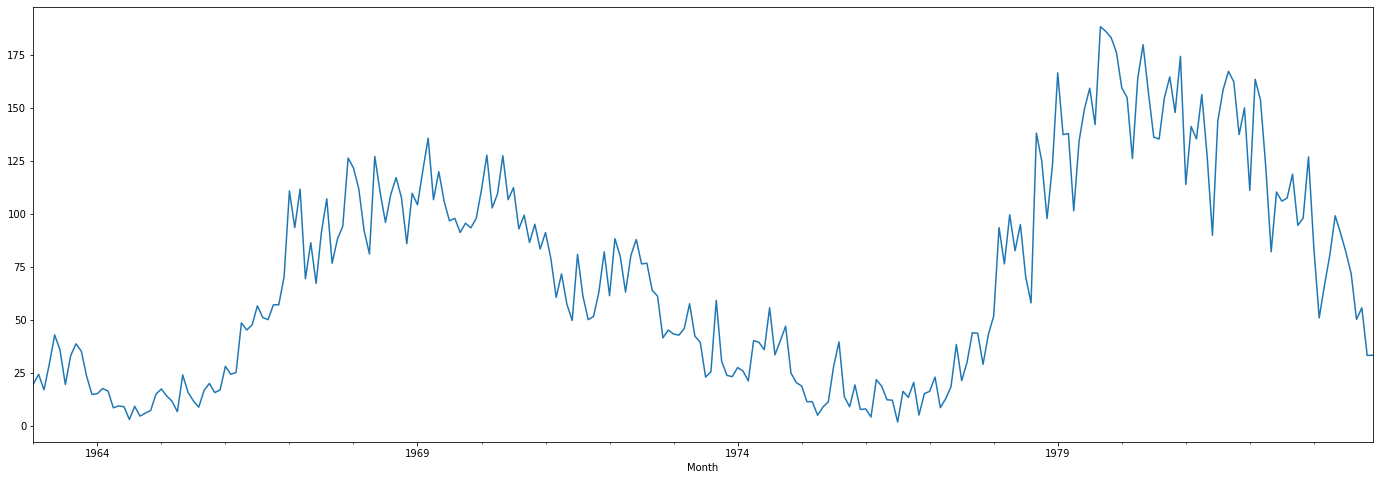

In [67]:
import matplotlib.pyplot as plt
series.plot(figsize=(24,8))

### 1.7   (2 puntos)

- Agrupe los datos y muestre un gráfico similar al de la seccion 6.3 de las lecturas (Stacked lines plots).  
- ¿Puede hacer algún comentario del comportamiento anual de los datos?

### Respuesta
A simple vista es difícil notar un patrón entre los años, no se aprecia la temporalidad o alguna tendencia.
Sin embargo:
- Hay años que se parecen entre sí y no necesariamente seguidos tales como 1963 con 1965, 1968. También lo que son 1969 y 1970.
- Parece que los picos de Sunspots se mantenían mayoritariamente altos en el segundo trimestre hasta 1970, luego comenzaron a reflejarse más en el tercer trimestre del año.
- Finalmente al final de los datos, cerca de 1978 se estabilizan un poco más la cantidad de sunspots entre los meses, es decir,no varian tanto de un mes a otro con sus claras excepciones.

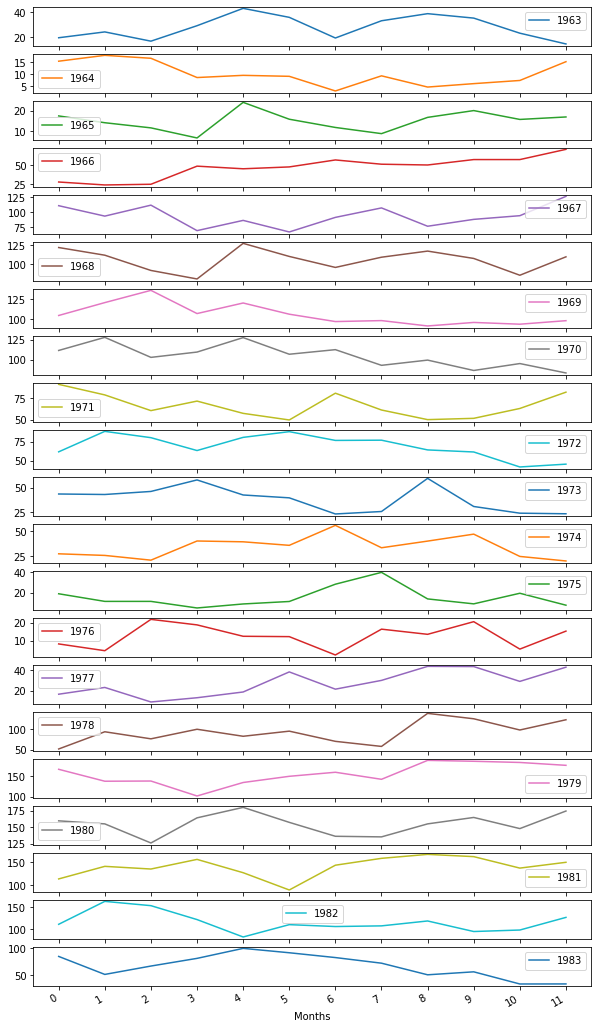

In [86]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html
groups = series.groupby(pd.Grouper(freq = 'A'))
years = pd.DataFrame()
months = [0,1,2,3,4,5,6,7,8,9,10,11]
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=True, figsize = (10,20), xlabel="Months" ,xticks = months)
plt.show()
    

In [68]:
from statsmodels.tsa.stattools import adfuller
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))


ADF Statistic: -2.255069
p-value: 0.186869
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


### 1.8   (2 puntos)
- Muestre el histograma de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


### Respuesta
NOTA: Se agrega la separación con 50 bins para mejorar la visualización de los datos, de aquí se concluye:
- La mayor parte de los sunspots tiene cerca de 4 apariciones.
- Se ve una decaida en cuanto a la aparición de los valores hacia el final del gráfico.
- Este histograma no es la mejor manera de visualizar los datos dado que funciona mejor con variables discretas y no continuas.

Month
1963-01-01    19.8
1963-02-01    24.4
1963-03-01    17.1
1963-04-01    29.3
1963-05-01    43.0
              ... 
1983-08-01    71.8
1983-09-01    50.3
1983-10-01    55.8
1983-11-01    33.3
1983-12-01    33.4
Name: Sunspots, Length: 252, dtype: float64


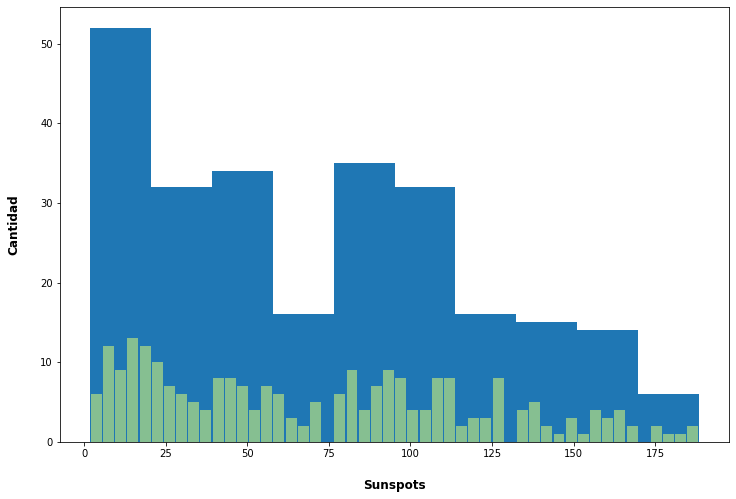

In [138]:
print(series)
#x=series.hist(bins=50, grid= False,figsize=(12,8),  color='#86bf91')
x = series.hist(bins=50, grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
series.hist(bins=10, grid= False,figsize=(12,8))
x.set_xlabel("Sunspots", labelpad=20, weight='bold', size=12)
x.set_ylabel("Cantidad", labelpad=20, weight='bold', size=12)
plt.show()

### 1.9   (2 puntos)
- Muestre el gráfico de densidad de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


### Respuesta
- Utilizando los valores por default del gaussian kernel podemos ver que los valores de los sunspots se concentran cerca de 25 y 100.

Month
1963-01-01    19.8
1963-02-01    24.4
1963-03-01    17.1
1963-04-01    29.3
1963-05-01    43.0
              ... 
1983-08-01    71.8
1983-09-01    50.3
1983-10-01    55.8
1983-11-01    33.3
1983-12-01    33.4
Name: Sunspots, Length: 252, dtype: float64


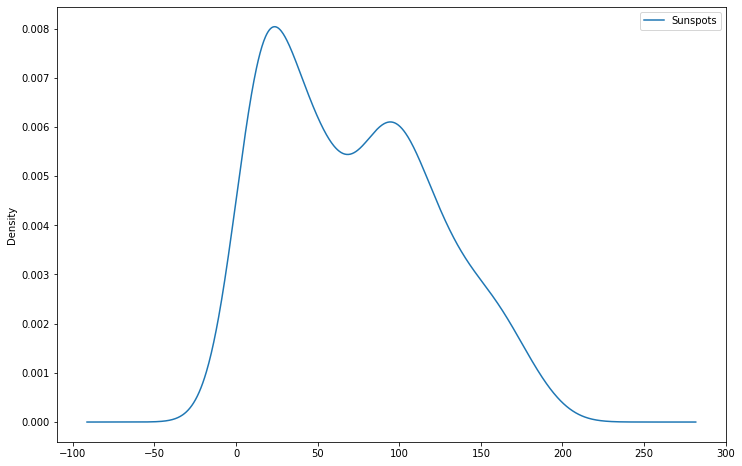

In [144]:
print(series)
series.plot(kind="kde", figsize=(12,8), legend=True)
plt.show()

### 1.10   (2 puntos)
- Agrupe los datos de la variable serie de manera Anual, y muestre los Boxplot de cada año. 
1. ¿Cómo se interpreta un gráfico Boxplot?
- Es una forma de mostrar la distribución de los datos, basados en el mínimo, el máximo, la media y dos cuartiles, el primero representando el 25% de los datos y el tercero el 75%.
interquartile range (IQR): rango entre el 25 y 75%
- máximo: Q3 + 1.5*IQR
- mínimo: Q1 - 1.5*IQR

Gracias a valor entre cuartiles podemos saber qué tan cerca se encuentran los datos de la media.
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?
- Podemos observar que luego de 1976 se empieza a dar una gran variabilidad en los datos dado el largo de sección intercuartíl.
- La mayor parte de los datos no son simétricos(2) sino que presentan una asimetría positiva (8) o negativa(10).
- No se ve una gran cantidad de valores atípicos en el transcurso de los años.

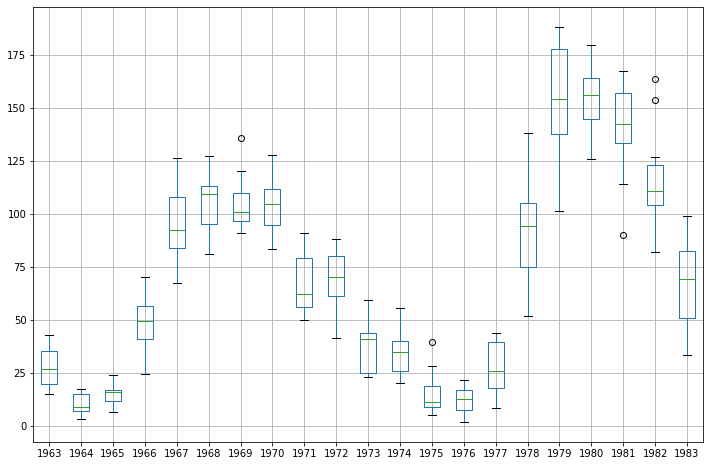

In [147]:
groups2 = series.groupby(pd.Grouper(freq = 'A'))
years2= pd.DataFrame()
for name, group in groups2:
    years2[name.year] = group.values
years2.boxplot(figsize=(12,8))
plt.show()

### 1.11   (2 puntos)
- Agrupe los datos de la variable serie de manera Anual, y muestre el Heat Map por año. 
1. ¿Cómo se interpreta un gráfico Heat Map?
- En el mapa de calor se encuentran zonas con mayor valor dentro de nuestro conjunto de datos. Los mapas de calor utilizan una escala de colores fríos y cálidos, los de mayor concentración (zonas cálidas) y menor concentración (zonas frías).
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?

- Podemos ver que cada fila representa los años del dataset, entre el año 4 y 7 (1967 y 1970) hay un ligero aumeto en cuanto al valor de los sunspots, además es más fuerte en el primer cuatrimestre.
- Se ve un segundo aumento entre el año 16 y 19 (1979 y 1982), presentándose aquí el valor más alto de todo el conjunto para el mes de setiembre de 1979.
- Entre los dos grupos grandes de altas visualizaciones se presentan secciones oscuras que se degradan de azul a negro por lo que no se presentaron visualizaciones altas de sunspots entre 1963 y 1966, lo mismo ocurre entre 1971 y 1978, siendo este último año una exepción a finales del último cuatrimestre.

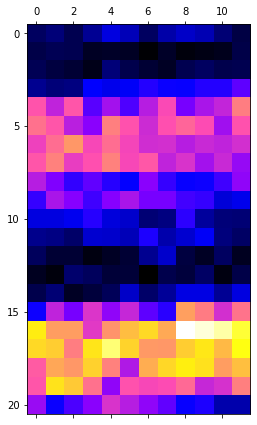

In [161]:
years3= pd.DataFrame()
for name, group in groups2:
    years3[name.year] = group.values
years3= years3.T
plt.matshow(years3, interpolation=None, aspect= 'auto', cmap=plt.cm.gnuplot2)
plt.show()

### 1.12   (2 puntos)
- Muestre el Lag Scatter plot de la variable series. 
1. ¿Cómo se interpreta un Lag Scatter plot?
- Un lag se puede entender como una observación previa en una serie de tiempo por lo que permite encontrar relaciones entre las observaciones y los lag.
- Si los puntos están más cercanos a la diagonal desde el fondo a la izquierda hacia el tope a la derecha entonces hay una correlación positiva.
- Si los puntos están cercanos a la diagonal desde el tope a la izquierda hacia abajo a la derecha entonces hay una correlación negativa.
- Entre más puntos haya cerca de la diagonal quiere decir que hay una mayor relación y entre más alejados o espercidos de la diagonal hay menor relación.

1. ¿Qué conclusiones puede sacar del comportamiento de los datos?
- En definitiva podemos notar que hay una corelación positiva de los datos, esto quiere decir que en promedio entre más cresca y(t)[Lag] aumenta más y(t+1) [original].
- Entre más aumenta el lag, podemos notar como crece la dispersión de los datos, es decir que pierden relación entre ellos.

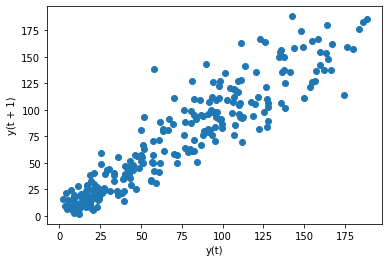

In [163]:
pd.plotting.lag_plot(series)
plt.show()

### 1.13   (2 puntos)
- Muestre el gráfico Autocorrelación de la variable series. 
1. ¿Cómo se interpreta este tipo de gráficos?
- Este gráfico representa la fuerza de relación entre las observaciones y sus lags. una correlación que se calcula entre 2 grupos con observaciones de lag=1 resultará entre valores de -1 y 1. El signo del número indica si la correlación es positiva o negativa, además, entre más cerca esté de 0 indica que más debil es la correlación.
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?
- Podemos ver que entre más aumenta el lag deja de haber una correlación entre los datos puesto que los valores decrecen y se acercan a 0.
- Los datos inician con una correlación positiva bastante fuerte en la primera sección del gráfico.

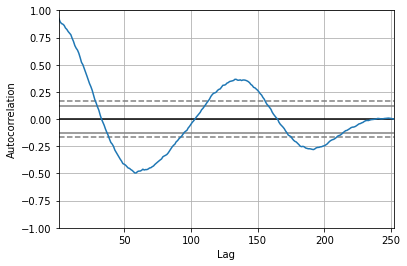

In [174]:
pd.plotting.autocorrelation_plot(series)
plt.show()

# Parte 2.  Diferenciación

Se le suministra un archivo llamado monthly-robberies2.csv.  

### 2.1   (3 puntos)
- Cargue el archivo proporcionado y muestre los 4 primeros registros.

### 2.2   (3 puntos)

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

### 2.3   (3 puntos)

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

### 2.4   (3 puntos)

- En un mismo gráfico de líneas, presente la serie original (en azul) y la serie diferenciada (en rojo).

### 2.5   (3 puntos)

- ¿Qué cambio nota de la serie antes de diferenciar a la serie diferenciada?


# Parte 3.  Regresión lineal y breve diseño experimental

Se le suministra un archivo llamado datos_practica2.csv.  

### 3.1    (5 puntos)
- Cargue el archivo.
- Muestre cuántas filas y cuántas columnas tiene el conjunto de datos.


### 3.2 (5 puntos)
- Divida entre X e y.
- Escale X utilizando MinMaxScaler. 
- Agregue la columna de bias (llena de 1's).
- Muestre los tres primeros registros.

### 3.3 (5 puntos)
- Divida entre train y test (tanto X como y).
- Utilice 70% train y 30% test, modo aleatorio.


### 3.4 (5 puntos)
- Considere el modelo $X_{train} *  w = y_{test}$
- Utilice X_train y y_train para encontrar el vector de pesos $w$ utilizando el concepto de mínimos cuadrados $\left(A^{T}A\right)^{-1}A^{T}\vec{b}$

**Nota:** En este punto la idea es usar multiplicación de matrices (álgebra lineal).


### 3.5 (5 puntos)

- Calcule un $y_{pred}$ utilizando $X_{test}$ y $w$.
- Calcule las métricas $R2$ y $MSE$ entre el $y_{pred}$ y el $y_{test}$
- ¿Qué puede decir de los resultados obtenidos?

### 3.6 (5 puntos)

- Vamos ahora a utilizar sklearn para calcular los pesos.
- Utilizando from sklearn.linear_model import LinearRegression, y la división anterior en train y test. Ajuste el modelo y calcule $y_{pred}$, calcule las métricas $R2$ y $MSE$ entre el $y_{pred}$ y el $y_{test}$. 
- ¿Qué puede decir de los resultados obtenidos comparados con los obtenidos en 3.5?


### 3.7 (5 puntos)

- En esta parte vamos a probar los conceptos de  tran/validation/test y cross-validation.
- Usando KFold y Ridge, prepare un diseño experimental con 60% train, 20% validation y 20% test (distribución de manera aleatoria), con 10 folds. 
- La idea es encontrar el mejor valor para el hiperparámetro alfa en el modelo (factor de regularización).
- Muestre los resultados obtenidos y coméntelos (mismas métricas $R2$ y $MSE$ ).


___

# Parte 4  -  Temas por grupo  (25 puntos)
___

Considere lo siguiente:
1. Revise en el archivo PDF: "Temas por grupo", qué cuadernos jupyter le corresponden a su grupo.
1. Estudie los cuadernos asignados.
1. Prepare un único cuaderno de jupyter (comentando con celdas de texto en español), en que resume las técnicas asignadas, con ejemplos de código como en los cuadernos asignados.  Debe buscar uno o más datasets diferentes a los que se usan en los cuadernos de jupyter asignados.
1. Prepare un video para una posible presentación de sus temas en clase, no debe durar más 15 minutos en la presentación de los temas asignados (Considere que el material preparado será compartido con sus compañer(a/o)s del curso y por tanto se espera que se esmere en su elaboración y clara explicación -- por favor -- ).
1. Para esta Parte 4, adjunta:
    - Cuaderno de Jupyter generado.
    - Datasets necesarios para correr su cuaderno.
    - Video producido.